<a href="https://colab.research.google.com/github/kavya2299/Machine-Learning/blob/master/ALL_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Make all the imports and load the datasets

In [0]:
import tensorflow 
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.externals import joblib
import os
from sklearn.linear_model import LogisticRegression
from os import sys
from sklearn.svm import SVC
from sklearn import tree
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import model_from_json
import statistics
from statistics import mean
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


11493376/11490434 [==============================] - 0s 0us/step


##Mount the drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##Data for all models

###Hierarchical data

In [0]:
train_h = np.empty(60000*7)
train_h = train_h.reshape(7,60000)

#def symmetry():
for i in range(60000):
  if train_labels[i]==0 or train_labels[i]==1 or train_labels[i]==3 or train_labels[i]==8:
    train_h[0][i]=1
  else:
    train_h[0][i]=0
  if(train_h[0][i]==1):
    if train_labels[i]==0 or train_labels[i]==1:
      train_h[1][i]=1
    else:
      train_h[1][i]=0
  else:
    train_h[1][i]=2
  if(train_h[1][i]==1):
      if train_labels[i]==1:
        train_h[2][i]=1
      else:
        train_h[2][i]=0
  else:
    train_h[2][i]=2
  if(train_h[1][i]==0):
      if train_labels[i]==3:
        train_h[3][i]=1
      else:
        train_h[3][i]=0
  else:
    train_h[3][i]=2      
  if(train_h[0][i]==0):
    if train_labels[i]==2 or train_labels[i]==7 or train_labels[i]==4:
      train_h[4][i]=1
    else:
      train_h[4][i]=0
  else:
    train_h[4][i]=2
  if(train_h[4][i]==1):
      if train_labels[i]==2:
        train_h[5][i]=0
      elif train_labels[i]==4:
        train_h[5][i]=1
      else:
        train_h[5][i]=2
  else:
    train_h[5][i]=3
  if(train_h[4][i]==0):
      if train_labels[i]==5:
        train_h[6][i]=0
      elif train_labels[i]==6:
        train_h[6][i]=1
      else:
        train_h[6][i]=2     
  else:
    train_h[6][i]=3

test_h = np.empty(10000*7)
test_h = test_h.reshape(7,10000)

#def symmetry():
for i in range(10000):
  if test_labels[i]==0 or test_labels[i]==1 or test_labels[i]==3 or test_labels[i]==8:
    test_h[0][i]=1
  else:
    test_h[0][i]=0
  if(test_h[0][i]==1):
    if test_labels[i]==0 or test_labels[i]==1:
      test_h[1][i]=1
    else:
      test_h[1][i]=0
  else:
    test_h[1][i]=2
  if(test_h[1][i]==1):
      if test_labels[i]==1:
        test_h[2][i]=1
      else:
        test_h[2][i]=0
  else:
    test_h[2][i]=2
  if(test_h[1][i]==0):
      if test_labels[i]==3:
        test_h[3][i]=1
      else:
        test_h[3][i]=0
  else:
    test_h[3][i]=2      
  if(test_h[0][i]==0):
    if test_labels[i]==2 or test_labels[i]==7 or test_labels[i]==4:
      test_h[4][i]=1
    else:
      test_h[4][i]=0
  else:
    test_h[4][i]=2
  if(test_h[4][i]==1):
      if test_labels[i]==2:
        test_h[5][i]=0
      elif test_labels[i]==4:
        test_h[5][i]=1
      else:
        test_h[5][i]=2
  else:
    test_h[5][i]=3
  if(test_h[4][i]==0):
      if test_labels[i]==5:
        test_h[6][i]=0
      elif test_labels[i]==6:
        test_h[6][i]=1
      else:
        test_h[6][i]=2     
  else:
    test_h[6][i]=3


  

###Tournament data

In [0]:
train_t=np.empty(60000*10)
train_t=train_t.reshape(10,60000)

for k in range(10):
  for i in range(60000):
    if train_labels[i]==k:
      train_t[k][i]=1
    else:
      train_t[k][i]=0

test_t=np.empty(10000*10)
test_t=test_t.reshape(10,10000)

for k in range(10):
  for i in range(10000):
    if test_labels[i]==k:
      test_t[k][i]=1
    else:
      test_t[k][i]=0      
      

#Architectures and models

##Reshape the arrays (preprocessing)

In [0]:
scale = StandardScaler()

train_images=train_images.reshape(60000,784)
train_images=scale.fit_transform(train_images) 

##Logistic Regression

###Multiclass Classification Func

In [0]:
model = LogisticRegression(solver='lbfgs')
def log_reg_multiclass():
  global model
  model.fit(train_images,train_labels)
  os.chdir("/content/gdrive/My Drive/Data Science")
  joblib.dump(model, 'Multiclass_LR.pkl')

###Hierarchical Classification Func

In [0]:
log_reg=list()
def log_reg_hierarchical():
  os.chdir("/content/gdrive/My Drive/Data Science")
  global log_reg
  for k in range(7):
    log_reg.insert(k,LogisticRegression(solver='lbfgs')) 
    log_reg[k].fit(train_images,train_h[k])
    
    joblib.dump(log_reg[k], 'Hierarchical_LR_{}.pkl'.format(k)) 


###Tournament Classification Func

In [0]:
log = list()
def log_reg_tournament():
  global log
  for k in range(10):
    log.insert(k,LogisticRegression(solver = 'lbfgs')) 
    log[k].fit(train_images,train_t[k])
    joblib.dump(log[k], 'Tournament_LR_{}.pkl'.format(k))


##SVM

###Multiclass Classification Func

In [0]:
svm = SVC(gamma=0.001)
def svm_model():
  global svm
  svm.fit(train_images,train_labels)
  os.chdir("/content/gdrive/My Drive/Data Science")
  joblib.dump(svm, 'Multiclass_SVM.pkl')

###Hierarchical Classification Func

In [0]:
svm_h = list()
def svm_hierarchical():
  os.chdir("/content/gdrive/My Drive/Data Science")
  global svm_h
  for k in range(7):
    svm_h.insert(k,SVC(gamma=0.001)) 
    svm_h[k].fit(train_images,train_h[k])
    
    joblib.dump(svm_h[k], 'Hierarchical_SVM_{}.pkl'.format(k)) 


###Tournament Classification

In [0]:
svm_t = list()
def svm_tournament():
  global svm_t
  for k in range(10):
    svm_t.insert(k,SVC(gamma=0.001)) 
    svm_t[k].fit(train_images,train_t[k])
    joblib.dump(svm_t[k], 'Tournament_SVM_{}.pkl'.format(k))


##Decision Tree Classifier

###Multiclass Classification Func

In [0]:
decision = tree.DecisionTreeClassifier()
def tree_model():
  global decision
  decision.fit(train_images,train_labels)
  os.chdir("/content/gdrive/My Drive/Data Science")
  joblib.dump(decision, 'Multiclass_DT.pkl')


###Hierarchical Classification Func

In [0]:
dec_h = list()
def dec_hierarchical():
  os.chdir("/content/gdrive/My Drive/Data Science")
  global dec_h
  for k in range(7):
    dec_h.insert(k,tree.DecisionTreeClassifier()) 
    dec_h[k].fit(train_images,train_h[k])
    
    joblib.dump(dec_h[k], 'Hierarchical_DT_{}.pkl'.format(k)) 


###Tournament Classification Func

In [0]:
dec_t = list()
def dec_tournament():
  global dec_t
  for k in range(10):
    dec_t.insert(k,tree.DecisionTreeClassifier()) 
    dec_t[k].fit(train_images,train_t[k])
    joblib.dump(dec_t[k], 'Tournament_DT_{}.pkl'.format(k))


##DNNs

###Multiclass Classification Func

In [0]:
network=models.Sequential()
train_images=train_images.reshape((60000,28*28)) #reshaping
train_images=train_images.astype('float32')/255 #normalizing 


W0709 13:23:19.755386 139644263229312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
def dnn_multiclass():
 
  network.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.00001),activation='relu',input_shape=(28*28,))) # tested on l2 reg parameter being 0.1,0.001,0.0001 and finally the best performance was on 0.00001 
  network.add(layers.Dense(10,activation='softmax')) # softmax because they all add up to 1

  network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

  model=network.fit(train_images,to_categorical(train_labels),epochs=5,batch_size=512,verbose=0)
  
  model_json = network.to_json()
  with open("network.json", "w") as json_file:
      json_file.write(model_json)
    # serialize weights to HDF5
  network.save_weights("network.h5")#Saved model to disk
  json_file = open('network.json', 'r')   # load json and create model
  global loaded_model_json
  loaded_model_json = json_file.read()
  json_file.close()
  


###Hierarchical Classification Func

###Tournament Classification Func

##Load the models

In [0]:
def load_multiclass_log():
  return joblib.load('Multiclass_LR.pkl')
def load_hierarchical_log(k):
  return joblib.load('Hierarchical_LR_{}.pkl'.format(k))
def load_tournament_log(k):
  return joblib.load('Tournament_LR_{}.pkl'.format(k))    

def load_multiclass_svm():
  return joblib.load('Multiclass_SVM.pkl')
def load_hierarchical_svm(k):
  return joblib.load('Hierarchical_SVM_{}.pkl'.format(k))
def load_tournament_svm(k):
  return joblib.load('Tournament_SVM_{}.pkl'.format(k))    

def load_multiclass_dec():
  return joblib.load('Multiclass_DT.pkl')
def load_hierarchical_dec(k):
  return joblib.load('Hierarchical_DT_{}.pkl'.format(k))
def load_tournament_dec(k):
  return joblib.load('Tournament_DT_{}.pkl'.format(k))    

def load_multiclass_dnn():
  loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
  return loaded_model.load_weights("network.h5")#Loaded model from disk")

def load_hierarchical_dnn(k):
  return joblib.load('Hierarchical_DNN_{}.pkl'.format(k))
def load_tournament_dnn(k):
  return joblib.load('Tournament_DNN_{}.pkl'.format(k))    


#Distortions 

In [0]:
percent=[1,5,20,40]
import numpy as np
import random
row=list()
col=list()
pixels=0

original_images=np.empty(10000*28*28)
original_images=original_images.reshape(10000,28,28)

dist_images=np.empty(10000*28*28)
dist_images=dist_images.reshape(10000,28,28)

for i in range(10000):
  for j in range(28):
    for k in range(28):
      original_images[i][j][k]=test_images[i][j][k]

def back_to_original():
  global test_images
  test_images=test_images.reshape(10000,28,28)
  test_images=test_images.astype('int')
  for i in range(10000):
    for j in range(28):
      for k in range(28):
        test_images[i][j][k]=original_images[i][j][k]

def get_no_pixels(i):
  
  if i in range(7):
    global pixels
    
    pixels=int((percent[i]/100)*784)


##boxed distortions

In [0]:
def distort_square(image_no,index):
  global row
  global col
  global dist_images
  global test_images
  if index in range(4):
    get_no_pixels(index)
  #print("no of pixels:",pixels)
  for j in range(pixels):
    row.insert(j,random.randint(5,23))
    col.insert(j,random.randint(5,23))
    dist_images[image_no][row[j]][col[j]]=random.randint(0,255)
    test_images[image_no][row[j]][col[j]]=dist_images[image_no][row[j]][col[j]]
  #plt.imshow(test_images[image_no],cmap=plt.cm.binary)   
  #plt.title("after distortion of",pixels)


##random distortions

In [0]:
def distort_random(image_no,index):
  global row
  global col
  global dist_images
  global test_images
  get_no_pixels(index)
  #print("no of pixels:",pixels)
  for j in range(pixels):
    row.insert(j,random.randint(0,27))
    col.insert(j,random.randint(0,27))
    dist_images[image_no][row[j]][col[j]]=random.randint(0,255)
    test_images[image_no][row[j]][col[j]]=dist_images[image_no][row[j]][col[j]]
   


##how the distortions work?

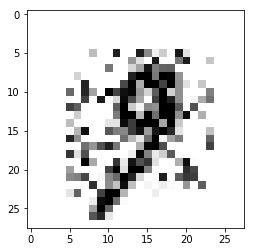

In [0]:
distort_square(1000,2)
plt.imshow(test_images[1000],cmap=plt.cm.binary)


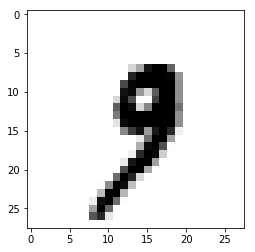

In [0]:
back_to_original()
plt.imshow(test_images[1000],cmap=plt.cm.binary)


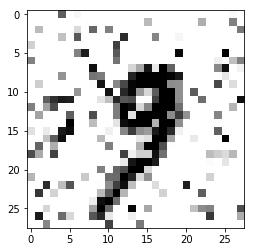

In [0]:
distort_random(1000,2)
plt.imshow(test_images[1000],cmap=plt.cm.binary)

#Predictions and accuracy

##Logistic Regression

###Multiclass

####No distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
model=load_multiclass_log()
#preprocessing

test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions = model.predict(test_images)
score = accuracy_score(test_labels,predictions)
print('\naccuracy=',score*100)

####boxed distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
model=load_multiclass_log()

prediction = np.empty(10000*4)
prediction = prediction.reshape(4,10000)


score = np.empty(4)
score = score.reshape(4,1)

for j in range(4):
  test_images=test_images.reshape(10000,28,28)
  

  print("\ndistortion = ",percent[j])
  for i in range(10000):
    sys.stdout.write("\r %i"%i)
    sys.stdout.flush()
    image_no = i
    distort_square(image_no,j)
  test_images=test_images.reshape(10000,784)
  test_images=scale.fit_transform(test_images)  
  prediction[j]=model.predict(test_images)
  import numpy as np
    #predict=to_categorical(predict)

  score[j] = accuracy_score(test_labels,prediction[j])
  print('\naccuracy=',score[j] *100)
  back_to_original()
score_df = pd.DataFrame(data=score)  


distortion =  1
 9999
accuracy= [90.78]

distortion =  5
 9999
accuracy= [85.89]

distortion =  20
 9999
accuracy= [70.93]

distortion =  40
 1961

####Random Distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
model=load_multiclass_log()

prediction = np.empty(10000*4)
prediction = prediction.reshape(4,10000)


score_dist = np.empty(4)
score_dist = score.reshape(4,1)

for j in range(4):
  test_images=test_images.reshape(10000,28,28)
  

  print("\ndistortion = ",percent[j])
  for i in range(10000):
    sys.stdout.write("\r %i"%i)
    sys.stdout.flush()
    image_no = i
    distort_random(image_no,j)
  test_images=test_images.reshape(10000,784)
  test_images=scale.fit_transform(test_images)  
  prediction[j]=model.predict(test_images)
  import numpy as np
    #predict=to_categorical(predict)

  score_dist[j] = accuracy_score(test_labels,prediction[j])
  print('\naccuracy=',score[j] *100)
  back_to_original()
score_dist_df=pd.DataFrame(data=score_dist)  

In [0]:
plt.plot()

###Hierarchical

####no distortions

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_h=np.empty(10000*7)
predictions_h=predictions_h.reshape(7,10000)

score_h=np.empty(7)
score_h=score_h.reshape(7,1)

os.chdir("/content/gdrive/My Drive/Data Science")
for k in range(7):
  log_reg.insert(k,load_hierarchical_log(k))
  predictions_h[k] = log_reg[k].predict(test_images)
  score_h[k] = accuracy_score(test_h[k],predictions_h[k])
  print('\naccuracy of',k+1,'th stage = ',score_h[k]*100)
print("\nmean =",score_h.mean()*100)

####boxed distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_h = np.empty(10000*4*7)
prediction_h = prediction_h.reshape(7,4,10000)

score = np.empty(7*4)
score = score.reshape(7,4,1)
for k in range(7):
  log_reg.insert(k,load_hierarchical_log(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_square(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_h[k][j]=log_reg[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_h[k],prediction_h[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

####random

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_h = np.empty(10000*4*7)
prediction_h = prediction_h.reshape(7,4,10000)

score = np.empty(7*4)
score = score.reshape(7,4,1)
for k in range(7):
  log_reg.insert(k,load_hierarchical_log(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_random(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_h[k][j]=log_reg[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_h[k],prediction_h[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

###Tournament 

####no distortions

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_t=np.empty(10000*10)
predictions_t=predictions_t.reshape(10,10000)

score_t=np.empty(10)
score_t=score_t.reshape(10,1)

os.chdir("/content/gdrive/My Drive/Data Science")
maxi = 0
for k in range(10):
  log.insert(k,load_tournament_log(k))
  predictions_t[k] = log[k].predict(test_images)
  score_t[k] = accuracy_score(test_t[k],predictions_t[k])
  print('\naccuracy of',k,'=',score_t[k]*100)
  maxi= max(maxi,score_t[k]*100)
  
print("\naccuracy of maximum =",maxi)


####random

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_t = np.empty(10000*4*10)
prediction_t = prediction_t.reshape(10,4,10000)

score = np.empty(10*4)
score = score.reshape(10,4,1)
for k in range(10):
  log.insert(k,load_tournament_log(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_random(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_t[k][j]=log[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_t[k],prediction_t[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

####boxed

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_t = np.empty(10000*4*10)
prediction_t = prediction_t.reshape(10,4,10000)

score = np.empty(10*4)
score = score.reshape(10,4,1)
for k in range(10):
  log.insert(k,load_tournament_log(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_square(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_t[k][j]=log[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_t[k],prediction_t[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

##SVM

###Multiclass

####no distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
svm=load_multiclass_svm()
#preprocessing

test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

prediction_svm = svm.predict(test_images)
score = accuracy_score(test_labels,prediction_svm)
print('\naccuracy=',score*100)


###Hierarchical

####no distortions

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_svmh=np.empty(10000*7)
predictions_svmh=predictions_svmh.reshape(7,10000)

score_svmh=np.empty(7)
score_svmh=score_svmh.reshape(7,1)

os.chdir("/content/gdrive/My Drive/Data Science")
for k in range(7):
  svm_h.insert(k,load_hierarchical_svm(k))
  predictions_svmh[k] = svm_h[k].predict(test_images)
  score_svmh[k] = accuracy_score(test_h[k],predictions_svmh[k])
  print('\naccuracy of',k+1,'th stage = ',score_svmh[k]*100)
print("mean =",score_svmh.mean())  

###Tournament

####no distortions

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_svmt=np.empty(10000*10)
predictions_svmt=predictions_svmt.reshape(10,10000)

score_svmt=np.empty(10)
score_svmt=score_svmt.reshape(10,1)

os.chdir("/content/gdrive/My Drive/Data Science")
maxi = 0
for k in range(10):
  svm_t.insert(k,load_tournament_svm(k))
  predictions_svmt[k] = svm_t[k].predict(test_images)
  score_svmt[k] = accuracy_score(test_t[k],predictions_svmt[k])
  print('\naccuracy of',k,'=',score_svmt[k]*100)
  
  maxi= max(maxi,score_svmt[k]*100)
print("\naccuracy of maximum =",maxi)


##Decision Tree Classifier

###Multiclass

####no distortions

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
decision=load_multiclass_dec()
#preprocessing

test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

prediction_d = decision.predict(test_images)
score_d = accuracy_score(test_labels,prediction_d)
print('\naccuracy=',score_d*100)


####random

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
model=load_multiclass_dec()

prediction = np.empty(10000*4)
prediction = prediction.reshape(4,10000)


score = np.empty(4)
score = score.reshape(4,1)

for j in range(4):
  test_images=test_images.reshape(10000,28,28)
  

  print("\ndistortion = ",percent[j])
  for i in range(10000):
    sys.stdout.write("\r %i"%i)
    sys.stdout.flush()
    image_no = i
    distort_random(image_no,j)
  test_images=test_images.reshape(10000,784)
  test_images=scale.fit_transform(test_images)  
  prediction[j]=model.predict(test_images)
  import numpy as np
    #predict=to_categorical(predict)

  score[j] = accuracy_score(test_labels,prediction[j])
  print('\naccuracy=',score[j] *100)
  back_to_original()

####boxed

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")
model=load_multiclass_dec()

prediction = np.empty(10000*4)
prediction = prediction.reshape(4,10000)


score = np.empty(4)
score = score.reshape(4,1)

for j in range(4):
  test_images=test_images.reshape(10000,28,28)
  

  print("\ndistortion = ",percent[j])
  for i in range(10000):
    sys.stdout.write("\r %i"%i)
    sys.stdout.flush()
    image_no = i
    distort_square(image_no,j)
  test_images=test_images.reshape(10000,784)
  test_images=scale.fit_transform(test_images)  
  prediction[j]=model.predict(test_images)
  import numpy as np
    #predict=to_categorical(predict)

  score[j] = accuracy_score(test_labels,prediction[j])
  print('\naccuracy=',score[j] *100)
  back_to_original()

###Hierarchical

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_dth=np.empty(10000*7)
predictions_dth=predictions_dth.reshape(7,10000)

score_dth=np.empty(7)
score_dth=score_dth.reshape(7,1)

os.chdir("/content/gdrive/My Drive/Data Science")
for k in range(7):
  dec_h.insert(k,load_hierarchical_dec(k))
  predictions_dth[k] = dec_h[k].predict(test_images)
  score_dth[k] = accuracy_score(test_h[k],predictions_dth[k])
  print('\naccuracy of',k+1,'th stage = ',score_dth[k]*100)
print("\nmean =",score_dth.mean()*100)  

####random

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_h = np.empty(10000*4*7)
prediction_h = prediction_h.reshape(7,4,10000)

score = np.empty(7*4)
score = score.reshape(7,4,1)
for k in range(7):
  dec_h.insert(k,load_hierarchical_dec(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_random(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_h[k][j]=dec_h[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_h[k],prediction_h[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

####boxed

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_h = np.empty(10000*4*7)
prediction_h = prediction_h.reshape(7,4,10000)

score = np.empty(7*4)
score = score.reshape(7,4,1)
for k in range(7):
  dec_h.insert(k,load_hierarchical_dec(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_square(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_h[k][j]=dec_h[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_h[k],prediction_h[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
for j in range(4):
  print("mean of all stages for a distortion of",k,"=",score[:,j])

##Tournament

In [0]:
#preprocessing
test_images=test_images.reshape(10000,784)
test_images=scale.fit_transform(test_images)

predictions_dt=np.empty(10000*10)
predictions_dt=predictions_dt.reshape(10,10000)

score_dt=np.empty(10)
score_dt=score_dt.reshape(10,1)

os.chdir("/content/gdrive/My Drive/Data Science")
maxi = 0
for k in range(10):
  dec_t.insert(k,load_tournament_dec(k))
  predictions_dt[k] = dec_t[k].predict(test_images)
  score_dt[k] = accuracy_score(test_t[k],predictions_dt[k])
  print('\naccuracy of',k,'=',score_dt[k]*100)
  maxi= max(maxi,score_dt[k]*100)
print("\naccuracy of maximum =",maxi)

####random

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_t = np.empty(10000*4*10)
prediction_t = prediction_t.reshape(10,4,10000)

score = np.empty(10*4)
score = score.reshape(10,4,1)
for k in range(10):
  dec_t.insert(k,load_tournament_dec(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_random(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_t[k][j]=dec_t[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_t[k],prediction_t[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)


####boxed

In [0]:
os.chdir("/content/gdrive/My Drive/Data Science")

prediction_t = np.empty(10000*4*10)
prediction_t = prediction_t.reshape(10,4,10000)

score = np.empty(10*4)
score = score.reshape(10,4,1)
for k in range(10):
  dec_t.insert(k,load_tournament_dec(k))
  for j in range(4):
    print("\ndistortion = ",percent[j])
    for i in range(10000):
      sys.stdout.write("\r %i"%i)
      sys.stdout.flush()
      image_no = i
      distort_square(image_no,j)
    test_images=test_images.reshape(10000,784)
    test_images=scale.fit_transform(test_images) 
    prediction_t[k][j]=dec_t[k].predict(test_images)
    import numpy as np
      #predict=to_categorical(predict)
    back_to_original()
    score[k][j] = accuracy_score(test_t[k],prediction_t[k][j])
    #print('\naccuracy of',k,'th stage=',score[k][j] *100)
    
